In [ ]:
import tensorflow as tf
from keras.utils import np_utils
import keras
import matplotlib.pyplot as plt

In [ ]:
def save_plot_log(log):
    plt.plot(list(range(len(log.history['loss']))), log.history['loss'], label="loss")
    plt.ylabel('loss')
    plt.plot(list(range(len(log.history['val_loss']))), log.history['val_loss'], label="val_loss")
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    plt.plot(list(range(len(log.history['categorical_accuracy']))), log.history['categorical_accuracy'], label="categorical_accuracy")
    plt.ylabel('categorical_accuracy')
    plt.plot(list(range(len(log.history['val_categorical_accuracy']))), log.history['val_categorical_accuracy'], label="val_categorical_accuracy")
    plt.ylabel('val_categorical_accuracy')
    plt.legend()
    plt.show()


In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
MLX_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
X_train=X_train[:X_train.shape[0]].reshape(X_train.shape[0], 32*32*3)
X_test=X_test[:X_test.shape[0]].reshape(X_test.shape[0], 32*32*3)
y_train=keras.utils.np_utils.to_categorical(y_train[:y_train.shape[0]], 10)
y_test=keras.utils.np_utils.to_categorical(y_test[:y_train.shape[0]], 10)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(500, input_shape=(32*32*3,), activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(250, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(125, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 500)               1536500   
_________________________________________________________________
dropout_61 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 250)               125250    
_________________________________________________________________
dropout_62 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 125)               31375     
_________________________________________________________________
dropout_63 (Dropout)         (None, 125)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 64)              

Epoch 1/80
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0638 - categorical_accuracy: 0.5040 - val_loss: 0.0630 - val_categorical_accuracy: 0.5062
Epoch 2/80
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0634 - categorical_accuracy: 0.5077 - val_loss: 0.0633 - val_categorical_accuracy: 0.5029
Epoch 3/80
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0635 - categorical_accuracy: 0.5069 - val_loss: 0.0633 - val_categorical_accuracy: 0.5051
Epoch 4/80
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0633 - categorical_accuracy: 0.5081 - val_loss: 0.0631 - val_categorical_accuracy: 0.5074
Epoch 5/80
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0633 - categorical_accuracy: 0.5114 - val_loss: 0.0628 - val_categorical_accuracy: 0.5055
Epoch 6/80
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0629 - categorical_accuracy: 0.5128 - val_loss: 0.0641 - val_categorical_accuracy:

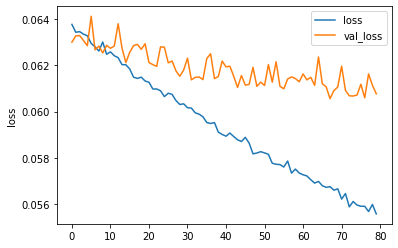

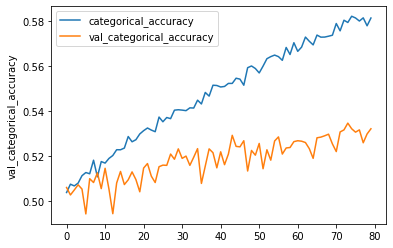

In [ ]:
sgd=tf.keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd , metrics=['categorical_accuracy'],loss=tf.keras.losses.mse)
log=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)
save_plot_log(log)